In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cftime

In [2]:
pr1980 = xr.open_dataset("../../../data/2.2km/rcp85/01/pr/pr_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc")

In [3]:
pr1980.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 606, grid_longitude: 484, time: 360)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          (ensemble_member) |S27 ...
    latitude                    (grid_latitude, grid_longitude) float64 ...
    longitude                   (grid_latitude, grid_longitude) float64 ...
    month_number                (time) int32 ...
    year                        (time) int32 ...
    yyyymmdd                    (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    rotated_latit

(array([1.05559882e+08, 2.53110000e+04, 2.84900000e+03, 9.00000000e+02,
        2.96000000e+02, 9.60000000e+01, 4.90000000e+01, 2.40000000e+01,
        2.40000000e+01, 9.00000000e+00]),
 array([  0.      ,  84.555466, 169.11093 , 253.66638 , 338.22186 ,
        422.7773  , 507.33276 , 591.88824 , 676.4437  , 760.99915 ,
        845.5546  ], dtype=float32),
 <BarContainer object of 10 artists>)

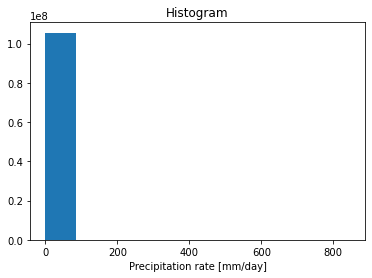

In [4]:
pr1980['pr'].plot()

In [5]:
pr_single_day = pr1980.pr.sel(ensemble_member=1, time=cftime.Datetime360Day(1980, 12, 1, 12, 0, 0, 0))

pr_single_day

<xarray.DataArray 'pr' (grid_latitude: 606, grid_longitude: 484)>
[293304 values with dtype=float32]
Coordinates:
    ensemble_member     int32 1
    time                object 1980-12-01 12:00:00
  * grid_latitude       (grid_latitude) float64 -4.683 -4.647 ... 8.027 8.063
  * grid_longitude      (grid_longitude) float64 353.9 354.0 ... 364.3 364.3
    ensemble_member_id  |S27 ...
    latitude            (grid_latitude, grid_longitude) float64 ...
    longitude           (grid_latitude, grid_longitude) float64 ...
    month_number        int32 ...
    year                int32 ...
    yyyymmdd            |S64 ...
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      Precipitation rate
    units:          mm/day
    description:    Precipitation rate
    label_units:    mm/day
    plot_label:     Precipitation rate (mm/day)
    cell_methods:   time: mean
    grid_mapping:   rotated_latitude_longitude

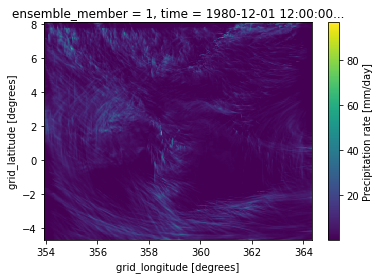

In [6]:
pr_single_day.plot()

2.2km CP model usea rotated pole
https://www.metoffice.gov.uk/pub/data/weather/uk/ukcp18/science-reports/UKCP-Convection-permitting-model-projections-report.pdf

In [7]:
cp_model_rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

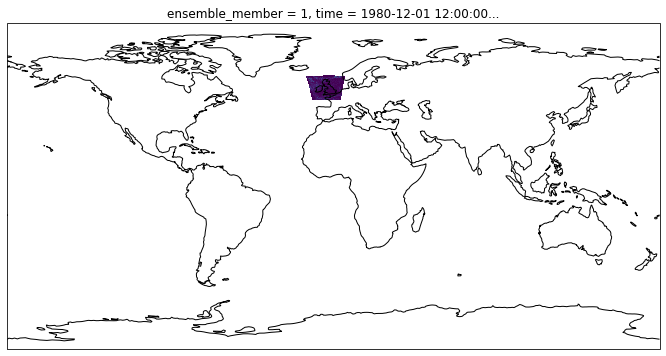

In [8]:
plt.figure(figsize=(14,6))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

pr_single_day.plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=False, transform=cp_model_rotated_pole)
ax.coastlines()
# ax.set_extent((354, 364, -4, 90))

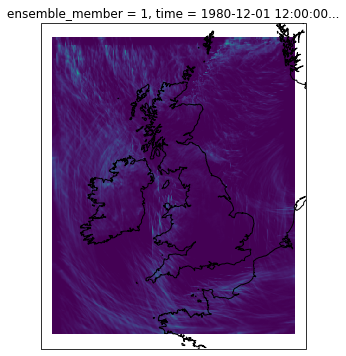

In [9]:
plt.figure(figsize=(14,6))

ax = plt.axes(projection=cp_model_rotated_pole)

pr_single_day.plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=False, transform=cp_model_rotated_pole)
ax.coastlines()